In [9]:
print("Tugas Besar Dasar Kecerdasan Artificial")
print("Menentukan tingkat kelulusan seseorang memasuki perguruan tinggi pascasarjana berdasarkan dataset Graduate Asmisson")

Tugas Besar Dasar Kecerdasan Artificial
Menentukan tingkat kelulusan seseorang memasuki perguruan tinggi pascasarjana berdasarkan dataset Graduate Asmisson


In [11]:
print("Muhammad Abdillah Hafizh (103012300369)")
print("Bintang Kantata")
print("Nabil")

Muhammad Abdillah Hafizh (103012300369)
Bintang Kantata
Nabil


In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
#memasukkan file
df = pd.read_csv("Admission_predict.csv")

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Hapus kolom "Serial No."
df.drop(columns=["Serial No."], inplace=True)

In [57]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [58]:
#cek apakah ada missing value
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [59]:
# Cek duplikat
df.duplicated().sum()

0

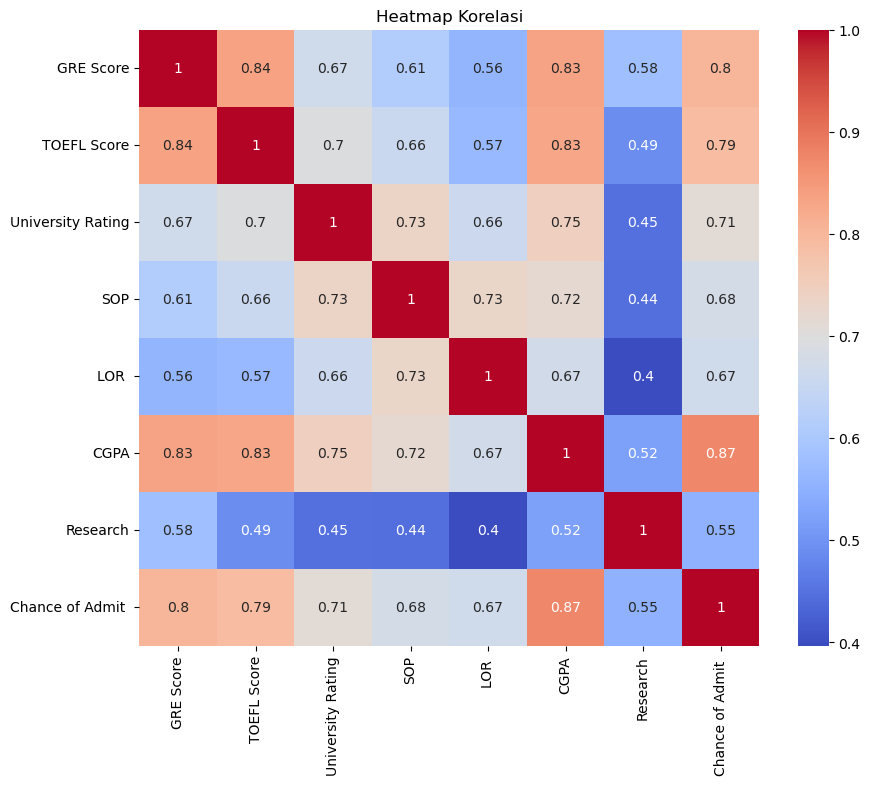

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

In [5]:
#mendefinisikan input dan output
GRE = ctrl.Antecedent(np.arange(260, 341, 1), 'GRE')
TOEFL = ctrl.Antecedent(np.arange(0, 121, 1), 'TOEFL')
CGPA = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'CGPA')
lulus = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'lulus')

In [6]:
#fungsi keanggotaan GRE
GRE['low']=fuzz.trimf(GRE.universe, [260, 280, 300])
GRE['med']=fuzz.trimf(GRE.universe, [290, 310, 320])
GRE['high']=fuzz.trimf(GRE.universe, [310, 325, 340])

#fungsi keangotaan TOEFl
TOEFL['low']=fuzz.trimf(TOEFL.universe, [0, 60, 80])
TOEFL['med']=fuzz.trimf(TOEFL.universe, [70, 85, 100])
TOEFL['high']=fuzz.trimf(TOEFL.universe, [90, 105, 120])

#fungsi keanggotaan CGPA
CGPA['low']=fuzz.trimf(CGPA.universe, [0.0, 5.0, 6.5])
CGPA['med']=fuzz.trimf(CGPA.universe, [6.0, 7.5, 9.0])
CGPA['high']=fuzz.trimf(CGPA.universe, [8.0, 9.0, 10.0])

#fungsi keanggotaan untuk lulus
lulus['tidak diterima']=fuzz.trimf(lulus.universe, [0.0, 0.3, 0.5])
lulus['dipertimbangkan']=fuzz.trimf(lulus.universe, [0.4, 0.6, 0.8])
lulus['diterima']=fuzz.trimf(lulus.universe, [0.7, 0.85, 1.0])

d:\Anaconda\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


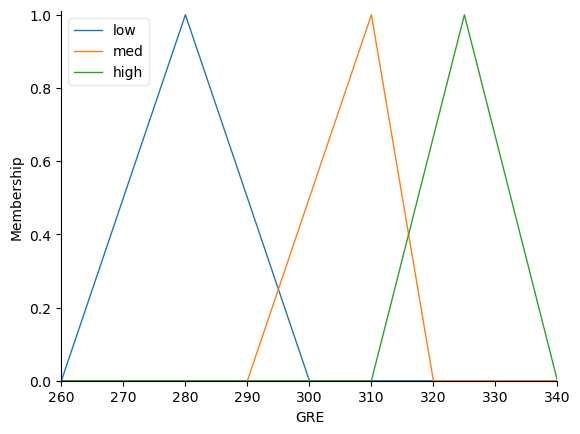

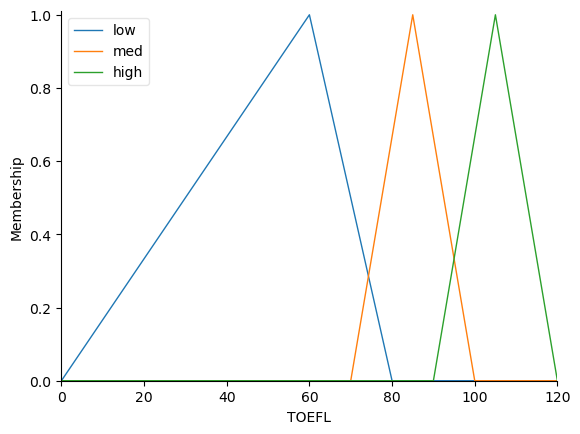

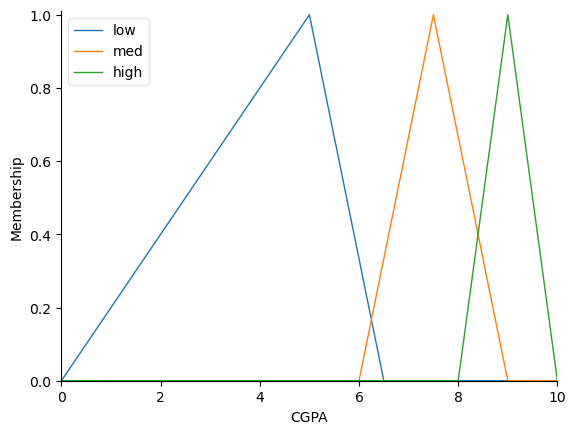

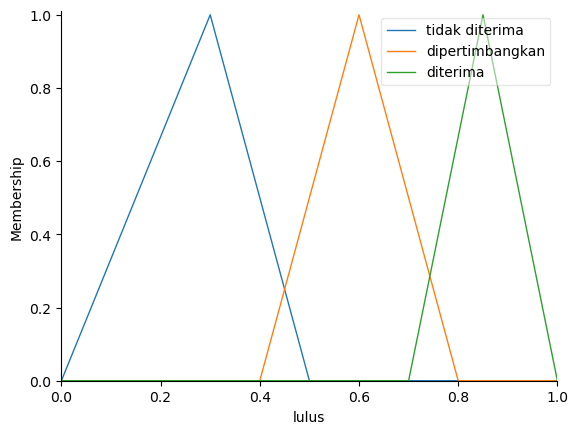

In [7]:
#tampilkan grafik
GRE.view()
TOEFL.view()
CGPA.view()
lulus.view()

In [8]:
# ===== RULES UNTUK KONDISI "DITERIMA" =====
rule1 = ctrl.Rule(GRE['high'] & TOEFL['high'] & CGPA['high'], lulus['diterima'])
rule2 = ctrl.Rule(GRE['high'] & TOEFL['med'] & CGPA['high'], lulus['diterima'])
rule3 = ctrl.Rule(GRE['med']  & TOEFL['high'] & CGPA['high'], lulus['diterima'])
rule4 = ctrl.Rule(GRE['high'] & TOEFL['high'] & CGPA['med'], lulus['diterima'])
rule5 = ctrl.Rule(GRE['med']  & TOEFL['med'] & CGPA['high'], lulus['diterima'])
rule6 = ctrl.Rule(GRE['high'] & TOEFL['med'] & CGPA['med'], lulus['diterima'])
rule7 = ctrl.Rule(GRE['med']  & TOEFL['high'] & CGPA['med'], lulus['diterima'])
rule8 = ctrl.Rule(GRE['high'] & TOEFL['low'] & CGPA['high'], lulus['diterima'])
rule9 = ctrl.Rule(GRE['high'] & TOEFL['high'] & CGPA['low'], lulus['diterima'])
rule10 = ctrl.Rule(GRE['med'] & TOEFL['med'] & CGPA['med'], lulus['diterima'])

# ===== RULES UNTUK KONDISI "TIDAK DITERIMA" =====
rule11 = ctrl.Rule(GRE['low'] & TOEFL['low'] & CGPA['low'], lulus['tidak diterima'])
rule12 = ctrl.Rule(GRE['low'] & TOEFL['med'] & CGPA['low'], lulus['tidak diterima'])
rule13 = ctrl.Rule(GRE['med'] & TOEFL['low'] & CGPA['low'], lulus['tidak diterima'])
rule14 = ctrl.Rule(GRE['low'] & TOEFL['low'] & CGPA['med'], lulus['tidak diterima'])
rule15 = ctrl.Rule(GRE['low'] & TOEFL['med'] & CGPA['med'], lulus['tidak diterima'])
rule16 = ctrl.Rule(GRE['med'] & TOEFL['low'] & CGPA['med'], lulus['tidak diterima'])
rule17 = ctrl.Rule(GRE['low'] & TOEFL['low'] & CGPA['high'], lulus['tidak diterima'])
rule18 = ctrl.Rule(GRE['low'] & TOEFL['high'] & CGPA['low'], lulus['tidak diterima'])
rule19 = ctrl.Rule(GRE['med'] & TOEFL['low'] & CGPA['high'], lulus['tidak diterima'])
rule20 = ctrl.Rule(GRE['low'] & TOEFL['high'] & CGPA['med'], lulus['tidak diterima'])

# ===== RULES UNTUK KONDISI "DIPERTIMBANGKAN" =====
rule21 = ctrl.Rule(GRE['high'] & TOEFL['low'] & CGPA['low'], lulus['dipertimbangkan'])
rule22 = ctrl.Rule(GRE['high'] & TOEFL['med'] & CGPA['low'], lulus['dipertimbangkan'])
rule23 = ctrl.Rule(GRE['high'] & TOEFL['low'] & CGPA['med'], lulus['dipertimbangkan'])
rule24 = ctrl.Rule(GRE['med'] & TOEFL['high'] & CGPA['low'], lulus['dipertimbangkan'])
rule25 = ctrl.Rule(GRE['med'] & TOEFL['low'] & CGPA['high'], lulus['dipertimbangkan'])
rule26 = ctrl.Rule(GRE['med'] & TOEFL['med'] & CGPA['low'], lulus['dipertimbangkan'])
rule27 = ctrl.Rule(GRE['low'] & TOEFL['high'] & CGPA['high'], lulus['dipertimbangkan'])
rule28 = ctrl.Rule(GRE['low'] & TOEFL['med'] & CGPA['high'], lulus['dipertimbangkan'])



# ===== SISTEM KONTROL FUZZY =====
lulus_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,
    rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28
])

lulus_simulasi = ctrl.ControlSystemSimulation(lulus_ctrl)

In [9]:
# Mensimulasikan input baru
lulus_simulasi.input['GRE'] = 320
lulus_simulasi.input['TOEFL'] = 100
lulus_simulasi.input['CGPA'] = 8.5

# Menghitung hasil
lulus_simulasi.compute()

# Menampilkan hasil
print(f"Kemungkinan Lulus: {lulus_simulasi.output['lulus']:.2f}")

Kemungkinan Lulus: 0.85


Kemungkinan Lulus: 0.85


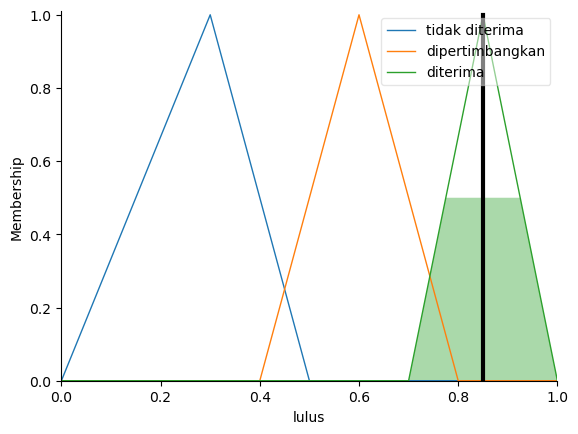

In [10]:

# Menampilkan hasil
print(f"Kemungkinan Lulus: {lulus_simulasi.output['lulus']:.2f}")

# 4. (Opsional) Tampilkan grafik
lulus.view(sim=lulus_simulasi)

Evaluasi Mode

In [13]:
# Fungsi konversi probabilitas ke label
def konversi_label(prob):
    if prob <= 0.4:
        return 'tidak diterima'
    elif prob <= 0.7:
        return 'dipertimbangkan'
    else:
        return 'diterima'


In [ ]:
#Ini data dummy 
X_test = np.array([
    [320, 100, 8.5],
    [280, 60, 5.5],
    [300, 85, 7.0],
])

y_test = [
    'diterima',
    'tidak diterima',
    'dipertimbangkan'
]

In [15]:
# Prediksi dengan sistem fuzzy
y_pred = []
for sample in X_test:
    GRE_val, TOEFL_val, CGPA_val = sample
    lulus_simulasi.input['GRE'] = GRE_val
    lulus_simulasi.input['TOEFL'] = TOEFL_val
    lulus_simulasi.input['CGPA'] = CGPA_val
    lulus_simulasi.compute()
    
    prob = lulus_simulasi.output['lulus']
    label_pred = konversi_label(prob)
    y_pred.append(label_pred)
    print(f"Input: GRE={GRE_val}, TOEFL={TOEFL_val}, CGPA={CGPA_val} -> Prob={prob:.2f}, Prediksi={label_pred}")

Input: GRE=320.0, TOEFL=100.0, CGPA=8.5 -> Prob=0.85, Prediksi=diterima
Input: GRE=280.0, TOEFL=60.0, CGPA=5.5 -> Prob=0.26, Prediksi=tidak diterima
Input: GRE=300.0, TOEFL=85.0, CGPA=7.0 -> Prob=0.85, Prediksi=diterima


In [16]:
# Mapping label ke angka untuk evaluasi
mapping = {'tidak diterima': 0, 'dipertimbangkan': 1, 'diterima': 2}
y_test_num = [mapping[label] for label in y_test]
y_pred_num = [mapping[label] for label in y_pred]

# Evaluasi model
print("Accuracy:", accuracy_score(y_test_num, y_pred_num))
print("F1 Score (macro):", f1_score(y_test_num, y_pred_num, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test_num, y_pred_num))

Accuracy: 0.6666666666666666
F1 Score (macro): 0.5555555555555555
Confusion Matrix:
 [[1 0 0]
 [0 0 1]
 [0 0 1]]
